In [1]:
import numpy as np
import pandas as pd
from regression import process,compare_model,create_model,predict_model

In [2]:
df = pd.read_csv('preprocess.csv')
df.dropna(inplace = True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,5
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,6
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,7
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [9]:
y = df['price']
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = process(X, y,
                                           test_size=0.3,
                                           normalize_method='zscore',
                                          )

In [10]:
compare_model(X_train, y_train,fold=5)

,Model,MAE,MSE,RMSE,R2,TT (Sec)
lr,Linear Regression,49.642649,6293.224268,79.307447,0.403100,3.512523
dt,Decision Tree Regressor,61.201963,10555.729356,102.729091,-0.001655,13.908195
gbr,Gradient Boosting Regressor,46.493646,5725.926142,75.648818,0.456892,25.335220
xgboost,Extreme Gradient Regressor,45.602754,5522.495149,74.284583,0.476205,8.323675
lightgbm,Light Gradient Boosting Machine,44.776628,5372.803336,73.276201,0.490387,1.372106


In [11]:
model = create_model(X_train, y_train,fold=10,md_name='lightgbm')

,MAE,MSE,RMSE,R2
Fold,,,,
0,43.450469,5001.226053,70.719347,0.502166
1,44.079143,5101.453759,71.424462,0.493554
2,43.802369,4738.584771,68.837379,0.542800
3,44.717553,5468.787440,73.951250,0.490747
4,44.835272,5697.364355,75.480887,0.483704
5,45.721826,5567.368846,74.614803,0.495879
6,44.335272,5187.612332,72.025081,0.510576
7,44.888320,5263.906045,72.552781,0.480455
8,44.044600,5220.923749,72.255960,0.480644


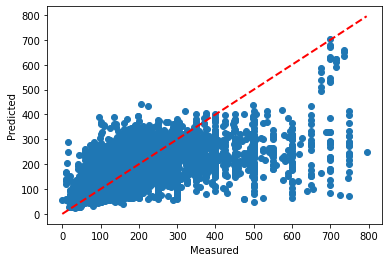

In [12]:
predict_model(X_test, y_test,model)